In [43]:
# Basics -----------------------------------------------------
import pickle
import time

import numpy as np
import pandas as pd
# from scipy import sparse

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn import metrics


# lidt træls af fortids magnus...
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import precision_score as precision
from sklearn.metrics import recall_score as recall
from sklearn.metrics import f1_score as f1
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix



# from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Sampling -------------------------------------------------

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# KERAS -----------------------------------------------------
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import RNN
from keras.layers import LSTM

from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=2) # stop after three epochs with no improvment.




In [263]:
from sklearn.naive_bayes import  BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
#from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

#from sklearn import metrics
#from sklearn.pipeline import Pipeline

# Functions

In [528]:
def roc_test(X, y_train = y_train, y_test = y_test, save_name = "roc_test.pdf", title = "some_title", model_names = "", clf = LogisticRegression(), show = True, digits = 5):
    """X should be a list of tuples, where each tuple contains X_train at [0] and X_test at [1]"""
    plt.figure(figsize=[8,8])
    count = 0
    
    for i in X:
        clf_fit = clf.fit(i[0], y_train)
        pred_proba = clf_fit.predict_proba(i[1])[:,1]
        fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_proba)
        auc = round(metrics.roc_auc_score(y_test, pred_proba), digits)
        plt.plot(fpr, tpr, label = model_names[count] + "AUC = " + str(auc))
        count +=1

    plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), linestyle = "dashed", color = "orange")

    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    
    
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.title(title, fontsize = 20)
    plt.xlabel('False Positive Rate', fontsize = 18)
    plt.ylabel('True Positive Rate', fontsize = 18)
    plt.grid(True)

    plt.legend(fontsize = 16)
    sns.despine(left=True, bottom= True)

    plt.savefig(save_name, bbox_inches="tight")
    
    if show:
        plt.show()

In [ ]:
def combinations_on_off(num_classifiers):
    return [[int(x) for x in list("{0:0b}".format(i).zfill(num_classifiers))]
            for i in range(1, 2 ** num_classifiers)]

# Import the processed data:

In [4]:
pkl_file = open('data_done.pkl', 'rb') # from feature set.
data_done = pickle.load(pkl_file)
pkl_file.close()

In [5]:
print(data_done.keys())
print(data_done["X_train"].shape)
print(data_done["X_test"].shape)

dict_keys(['y_train', 'y_test', 'X_train', 'X_test'])
(4079, 1400)
(1020, 1400)


But remember, this is your outer layer so you still need to split:

In [6]:
# constructing new inner layer:
y = data_done["y_train"] 
X = data_done["X_train"]



# normalization and standardization

In [29]:
# X_stand = ((X-np.mean(X))/np.std(X))
# X_norm = (X_stand - X_stand.min())/(X_stand.max()-X.min())
# print(X.shape)
# print(X_norm.shape)

(4079, 1400)
(4079, 1400)


# split

In [32]:
# Outer layer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=89) # new random seed!!!

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3263, 1400)
(816, 1400)
(3263,)
(816,)


# Models

**You should diffenately split it up agian so you have a final test set "never" used.**

# first step

### normal logit

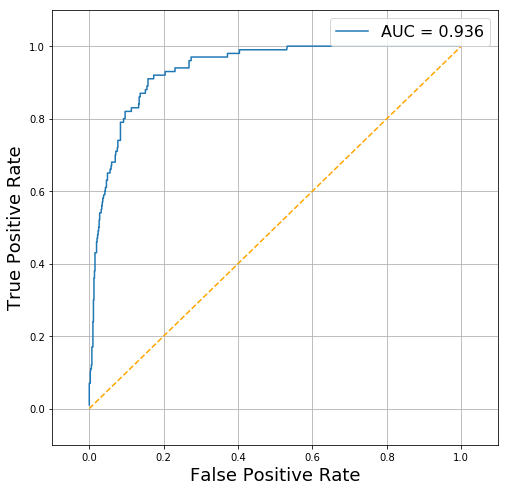

In [24]:
plt.figure(figsize=[8,8])

clf_lg = LogisticRegression().fit(X_train, y_train)
pred_proba_log = clf_lg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_proba_log)
auc = round(metrics.roc_auc_score(y_test, pred_proba_log), 3)
plt.plot(fpr, tpr, label = "AUC = " + str(auc))


plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), linestyle = "dashed", color = "orange")

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
#plt.title('ROC curve', fontsize = 18)
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.grid(True)

plt.legend(fontsize = 16)
#sns.despine(left=True, bottom= True)

plt.savefig('roc_all_new.pdf', bbox_inches="tight")

plt.show()
    

### Vol. 1 model:

In [33]:
clf2 = BernoulliNB() # Brug den her istedet for MNB!!!!
clf3 = LogisticRegression() # den her
clf4 = SGDClassifier()
#clf5 = LinearSVC() # Omitted du to no predict proba
clf6 = RandomForestClassifier()

In [34]:
alpha_range = np.arange(0.00001, 0.0001 , 0.000005)
    
param_grid = dict(alpha = alpha_range) 
grid = GridSearchCV(clf2, param_grid, cv=8, scoring="f1", n_jobs = -1) # Bernoulli NB

grid.fit(X_train ,y_train)

best_alpha = grid.best_params_["alpha"]


clf2 = BernoulliNB(alpha=best_alpha) # hentet fra overstående gridS.b

In [35]:
weight_range = [{1:1},{1:1.5},{1:2},{1:2.5},{1:3},{1:3.5},{1:4},{1:4.5},{1:5},{1:5.25},{1:5.5},{1:5.75},{1:6}]    
    
param_grid = dict(class_weight = weight_range) 
grid = GridSearchCV(clf3, param_grid, cv=8, scoring="f1", n_jobs = -1) # clf3 = LogisticRegression

grid.fit(X_train ,y_train) #

best_weight = grid.best_params_["class_weight"]


clf3 = LogisticRegression(class_weight= best_weight) # hentet fra overstående gridS.

In [42]:

weight_range = [{1:1},{1:1.5},{1:1.55},{1:1.6},{1:1.65},{1:1.7},{1:1.75},{1:1.8},{1:1.85},{1:2},{1:2.5}]    
alpha_range = np.arange(0.00001, 0.0001 , 0.000005)
    
param_grid = dict(alpha = alpha_range, class_weight = weight_range, max_iter=[1000]) 
grid = GridSearchCV(clf4, param_grid, cv=8, scoring="f1", n_jobs = -1) # clf4 = SGD Classifier

grid.fit(X_train ,y_train) #

best_alpha = grid.best_params_["alpha"]

best_weight = grid.best_params_["class_weight"]

clf4 = SGDClassifier(alpha=best_alpha, class_weight= best_weight, loss = "log", max_iter=1000, random_state= 42) 


# max_iter=5 and tol=None

In [37]:
weight_range = [{1:1},{1:1.5},{1:2},{1:2.25},{1:2.5},{1:2.75},{1:3},{1:3.5},{1:4},{1:4.5},{1:5},{1:5.5},{1:6}]    
    
param_grid = dict(class_weight = weight_range) 
grid = GridSearchCV(clf6, param_grid, cv=8, scoring="f1", n_jobs = -1) # clf6 = SGD RF classifier

grid.fit(X_train ,y_train)

best_weight = grid.best_params_["class_weight"]

clf6 = RandomForestClassifier(class_weight= best_weight, random_state= 42)

In [38]:
clfV = VotingClassifier(estimators=[("1",clf2),("2",clf3),("3",clf4),("4",clf6)],n_jobs=1) # seems to be the best..


In [39]:
test=clfV.fit(X_train, y_train)
y_pred_class = test.predict(X_test)


print("Confusion matrix: ")
print(metrics.confusion_matrix(y_test, y_pred_class))

print("\n")

print("Train vs. test scores: ")
print('acc: ',metrics.accuracy_score(y_test, y_pred_class))
print('recall: ',metrics.recall_score(y_test, y_pred_class))
print('prec: ',metrics.precision_score(y_test, y_pred_class))
print('f1: ',metrics.f1_score(y_test, y_pred_class))

# Det kan faktisk godt være den giver lidt...

/home/polichinel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Confusion matrix: 
[[708   8]
 [ 82  18]]


Train vs. test scores: 
acc:  0.8897058823529411
recall:  0.18
prec:  0.6923076923076923
f1:  0.28571428571428575


/home/polichinel/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


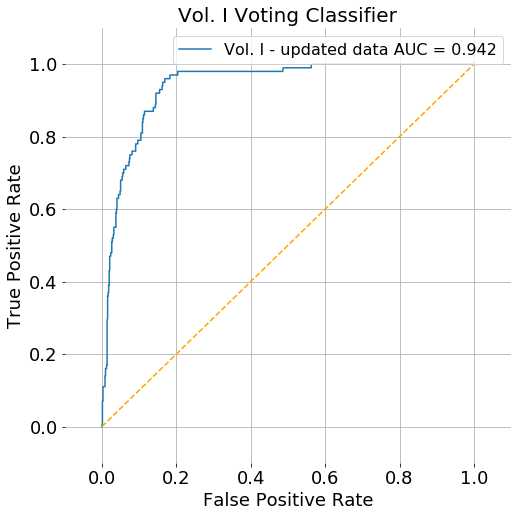

In [355]:
clfV = VotingClassifier(estimators=[("1",clf2),("2",clf3),("3",clf4),("4",clf6)], voting = "soft",n_jobs=1) # seems to be the best..

model_names = ["Vol. I - updated data "]
roc_test([(X_train, X_test)], title= "Vol. I Voting Classifier", save_name="vol_1_new_roc.pdf", model_names=model_names, clf = clfV, digits=3)



# more other classiiers:

#### Firstly crate a lot of classifiers: no grid search
then make a list approapiat for you roc_test and feed it the list.

# Mega fint, men så skal du køre grid search på alle!

So now you need to de an grid search on all seven classifiers.

# MAJOR GRID SEARCH

In [285]:
# includ timers here to survey the progress..

start_time = time.time()

classifier_list = [BernoulliNB(), 
                   LogisticRegression(), 
                   SGDClassifier(loss = "log", max_iter=1000, random_state= 42), 
                   RandomForestClassifier(random_state= 42, max_depth=5),
                   AdaBoostClassifier(random_state= 42),
                   MLPClassifier(random_state= 42),
                   GaussianProcessClassifier(random_state= 42)]


classifier_names = ["NB ","LOG_R ","SGD ", "RF ", "Ada ", "MLP ", "GP "]


# global grids ------------------------------------------------------------
#alpha_range = np.arange(1e-5, 1e-4 , 5e-6)
weight_range = [{1:1},{1:1.5}]    
#regularization = [1e-0,1e-1,1e-2,1e-3,1e-4]

# NB ----------------------------------------------------------------------

thresholds = np.arange(0,1,0.1)
nb_alpha_range = np.arange(1e-10, 1.05e-9 , 5e-11)
param_grid = dict(alpha = nb_alpha_range, binarize = thresholds) 
grid = GridSearchCV(classifier_list[0], param_grid, cv=8, scoring="roc_auc", n_jobs = -1, verbose = 1) # Bernoulli NB
grid.fit(X_train ,y_train)

NB_best_alpha = grid.best_params_["alpha"]
Nbest_thresholds = grid.best_params_["binarize"]


# update classifier
classifier_list[0] = BernoulliNB(alpha=NB_best_alpha, binarize = Nbest_thresholds) #

eclipsed_time = round((time.time() - start_time)/60,2)
print("1/6 ",classifier_names[0]," done!\t", str(eclipsed_time)," minutes spend\n")

# Logit ---------------------------------------------------------------------
    
#param_grid = dict(class_weight = weight_range, C=regularization) 
param_grid = dict(class_weight = weight_range) 
grid = GridSearchCV(classifier_list[1], param_grid, cv=8, scoring="roc_auc", n_jobs = -1, verbose = 1) # clf3 = LogisticRegression
grid.fit(X_train ,y_train) #
LG_best_weight = grid.best_params_["class_weight"]

# update classifier
classifier_list[1] = LogisticRegression(class_weight= best_weight)

eclipsed_time = round((time.time() - start_time)/60,2)
print("2/6 ",classifier_names[1]," done!", str(eclipsed_time)," minutes spend\n")


# SGD ------------------------------------------------------------------------


SGD_weight_range = [{1:3},{1:3.5},{1:4}] 
SGD_alpha_range = np.arange(1e-5, 1e-4 , 5e-6)


param_grid = dict(alpha = SGD_alpha_range, class_weight = SGD_weight_range, max_iter=[1000]) 
grid = GridSearchCV(classifier_list[2], param_grid, cv=8, scoring="roc_auc", n_jobs = -1, verbose = 1) # clf4 = SGD Classifier

grid.fit(X_train ,y_train) #

best_alpha = grid.best_params_["alpha"]

best_weight = grid.best_params_["class_weight"]

classifier_list[2] = SGDClassifier(alpha=best_alpha, class_weight= best_weight, loss = "log", max_iter=1000, random_state= 42) 

eclipsed_time = round((time.time() - start_time)/60,2)
print("3/6 ",classifier_names[2]," done!", str(eclipsed_time)," minutes spend\n")

# RF ---------------------------------------------------------------------------
impurity = ["gini","entropy"]
param_grid = dict(class_weight = weight_range, criterion = impurity) 

grid = GridSearchCV(classifier_list[3], param_grid, cv=8, scoring="roc_auc", n_jobs = -1, verbose = 1) # clf6 = SGD RF classifier

grid.fit(X_train ,y_train)

best_weight = grid.best_params_["class_weight"]

classifier_list[3] = RandomForestClassifier(class_weight= best_weight, random_state= 42)

eclipsed_time = round((time.time() - start_time)/60,2)
print("4/6 ",classifier_names[3]," done!", str(eclipsed_time)," minutes spend\n")

# Ada ----------------------------------------------------------------------

estimators = [DecisionTreeClassifier(max_depth=2), LogisticRegression()]
param_grid = dict(base_estimator = estimators) 

grid = GridSearchCV(classifier_list[4], param_grid, cv=8, scoring="roc_auc", n_jobs = -1, verbose = 1) # clf6 = SGD RF classifier

grid.fit(X_train ,y_train)

best_estimator = grid.best_params_["base_estimator"]

classifier_list[4] = AdaBoostClassifier(base_estimator = best_estimator, random_state= 42)

eclipsed_time = round((time.time() - start_time)/60,2)
print("5/6 ",classifier_names[4]," done!", str(eclipsed_time)," minutes spend\n")

# MLP ----------------------------------------------------------------------

MLP_alpha = [0.5,0.1,0.05]
early_stop = [False, True]
activation_func = ["identity", "logistic", "tanh", "relu"]

param_grid = dict(early_stopping = early_stop, activation = activation_func, alpha = MLP_alpha) 

grid = GridSearchCV(classifier_list[5], param_grid, cv=8, scoring="roc_auc", n_jobs = -1, verbose = 1) # clf6 = SGD RF classifier

grid.fit(X_train ,y_train)

best_alpha = grid.best_params_["alpha"]

best_early_stop = grid.best_params_["early_stopping"]

best_activstion =  grid.best_params_["activation"]

classifier_list[5] = MLPClassifier(early_stopping = best_early_stop, activation = best_activstion, alpha = best_alpha, random_state= 42)

eclipsed_time = round((time.time() - start_time)/60,2)
print("6/6 ",classifier_names[3]," done!", str(eclipsed_time)," minutes spend\n")

# GP ----------------------------------------------------------------------
# You don't optimize GP, bc kernales are a hasle.

Fitting 8 folds for each of 190 candidates, totalling 1520 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1520 out of 1520 | elapsed:  2.1min finished


1/6  NB   done!	 2.14  minutes spend

Fitting 8 folds for each of 2 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    8.2s finished


2/6  LOG_R   done! 2.29  minutes spend

Fitting 8 folds for each of 54 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 25.3min finished


3/6  SGD   done! 27.85  minutes spend

Fitting 8 folds for each of 4 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    5.9s finished


4/6  RF   done! 27.96  minutes spend

Fitting 8 folds for each of 2 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  2.3min finished


5/6  RF   done! 30.41  minutes spend

Fitting 8 folds for each of 24 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed: 27.2min finished


6/6  RF   done! 57.72  minutes spend



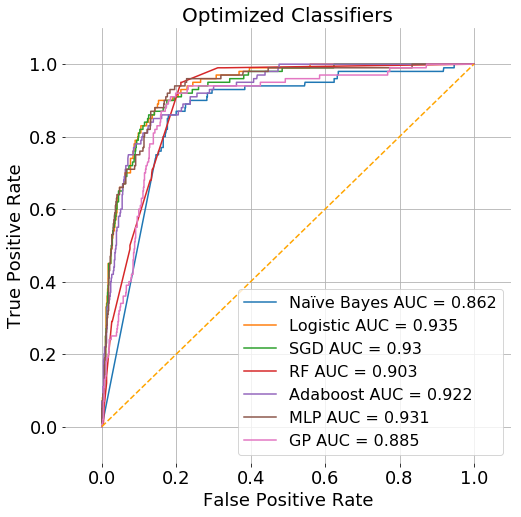

In [358]:
classifier_names2 = ["Naïve Bayes ","Logistic ","SGD ", "RF ", "Adaboost ", "MLP ", "GP "]

count = 0


plt.figure(figsize=[8,8])

for c in classifier_list:
    clf_fit = c.fit(X_train, y_train)
    pred_proba = clf_fit.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_proba)
    auc = round(metrics.roc_auc_score(y_test, pred_proba), 3)
    plt.plot(fpr, tpr, label = classifier_names2[count] + "AUC = " + str(auc))
    count +=1
    
plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), linestyle = "dashed", color = "orange")

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
        
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.title("Optimized Classifiers", fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.grid(True)

plt.legend(fontsize = 16)
sns.despine(left=True, bottom= True)

plt.savefig("optimized_roc.pdf", bbox_inches="tight")
    
plt.show()

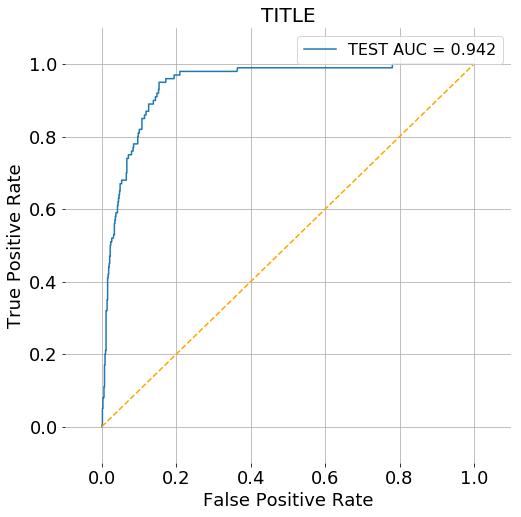

In [287]:

clfV = VotingClassifier(estimators=classifiers, voting = "soft", weights = [1,1,1,1,1,1,1] ,n_jobs=-1) # zeroes set on account of weight grid search
model_names = ["TEST "]
roc_test([(X_train, X_test)], title= "TITLE", save_name="TEST_roc.pdf", model_names=model_names, clf = clfV)


In [288]:
# This works great! But you need to impliment a or list to save the outputs
# set lige en counter og en timer ind.
auc_max = 0 # init
best_w = [] # init

for w in combinations_on_off(len(classifiers)):
    clfV = VotingClassifier(estimators=classifiers, voting = "soft", weights = w ,n_jobs=-1)
    
    clf_fit = clfV.fit(X_train, y_train)
    pred_proba = clf_fit.predict_proba(X_test)[:,1]
    
    auc = round(metrics.roc_auc_score(y_test, pred_proba), 5)
    print(str(auc), "\t" ,str(w))
    if auc > auc_max:
        auc_max = auc
        best_w = w


0.88483 	 [0, 0, 0, 0, 0, 0, 1]
0.9354 	 [0, 0, 0, 0, 0, 1, 0]
0.9296 	 [0, 0, 0, 0, 0, 1, 1]
0.87062 	 [0, 0, 0, 0, 1, 0, 0]
0.88558 	 [0, 0, 0, 0, 1, 0, 1]
0.93124 	 [0, 0, 0, 0, 1, 1, 0]
0.92693 	 [0, 0, 0, 0, 1, 1, 1]
0.89464 	 [0, 0, 0, 1, 0, 0, 0]
0.90245 	 [0, 0, 0, 1, 0, 0, 1]
0.93862 	 [0, 0, 0, 1, 0, 1, 0]
0.93293 	 [0, 0, 0, 1, 0, 1, 1]
0.90936 	 [0, 0, 0, 1, 1, 0, 0]
0.9055 	 [0, 0, 0, 1, 1, 0, 1]
0.93767 	 [0, 0, 0, 1, 1, 1, 0]
0.93395 	 [0, 0, 0, 1, 1, 1, 1]
0.93242 	 [0, 0, 1, 0, 0, 0, 0]
0.92896 	 [0, 0, 1, 0, 0, 0, 1]
0.94013 	 [0, 0, 1, 0, 0, 1, 0]
0.93547 	 [0, 0, 1, 0, 0, 1, 1]
0.92966 	 [0, 0, 1, 0, 1, 0, 0]
0.92992 	 [0, 0, 1, 0, 1, 0, 1]
0.93675 	 [0, 0, 1, 0, 1, 1, 0]
0.93537 	 [0, 0, 1, 0, 1, 1, 1]
0.93812 	 [0, 0, 1, 1, 0, 0, 0]
0.93374 	 [0, 0, 1, 1, 0, 0, 1]
0.94311 	 [0, 0, 1, 1, 0, 1, 0]
0.93656 	 [0, 0, 1, 1, 0, 1, 1]
0.93843 	 [0, 0, 1, 1, 1, 0, 0]
0.93589 	 [0, 0, 1, 1, 1, 0, 1]
0.9416 	 [0, 0, 1, 1, 1, 1, 0]
0.93832 	 [0, 0, 1, 1, 1, 1, 1]
0.93607 	 [0

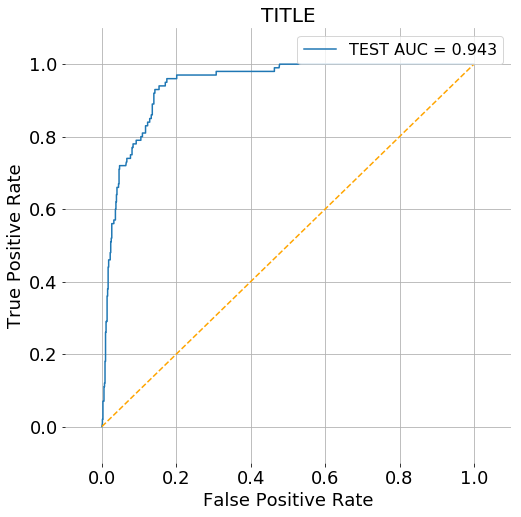

In [289]:
clfV = VotingClassifier(estimators=classifiers, voting = "soft", weights = best_w ,n_jobs=-1) # zeroes set on account of weight grid search
model_names = ["TEST "]
roc_test([(X_train, X_test)], title= "TITLE", save_name="TEST_roc.pdf", model_names=model_names, clf = clfV)

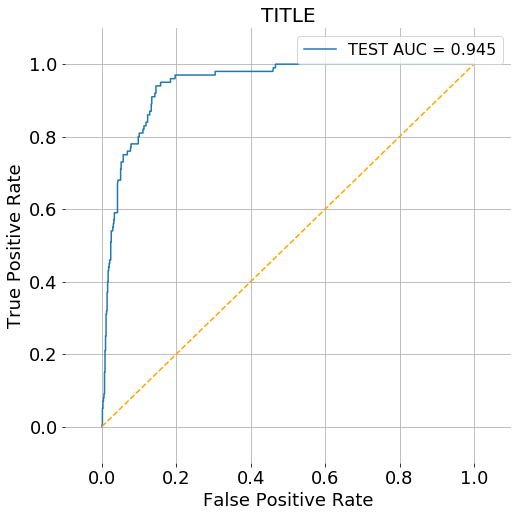

In [293]:
clfV = VotingClassifier(estimators=classifiers, voting = "soft", weights = [0, 2, 1, 1, 0, 2, 0] ,n_jobs=-1) # zeroes set on account of weight grid search
model_names = ["TEST "]
roc_test([(X_train, X_test)], title= "TITLE", save_name="TEST_roc.pdf", model_names=model_names, clf = clfV)

# Better weights

In [301]:
norm_weights = (weights-weights.min())/(weights.max()-weights.min())

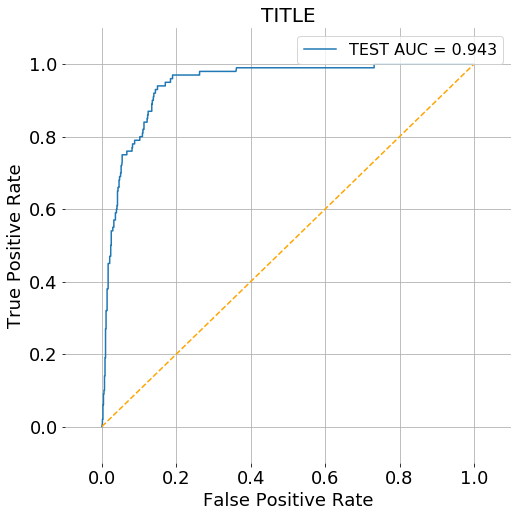

In [305]:
clfV = VotingClassifier(estimators=classifiers, voting = "soft", weights = list(norm_weights) ,n_jobs=-1) # zeroes set on account of weight grid search
model_names = ["TEST "]
roc_test([(X_train, X_test)], title= "TITLE", save_name="TEST_roc.pdf", model_names=model_names, clf = clfV)

# Boosted weights
men så skal du jo vælge et threshold...

In [292]:
def get_alpha(error_rate, log = np.log):
    alpha = (1/2)*log((1-error_rate)/error_rate)
    return(alpha)

In [333]:
boosted_weights = []
N = X_test.shape[0]

for c in classifier_list:
    clf = c.fit(X_train, y_train)
    pred_c= c.predict(X_test)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, pred_c).ravel()
    m =  fp + fn
    boosted_weights.append(get_alpha(m/N))
    
print(boosted_weights)

[0.7787015266555232, 1.1909793402677789, 1.183115179077201, 1.013381122842204, 1.075881101629731, 1.137958422955942, 1.0074515102711323]


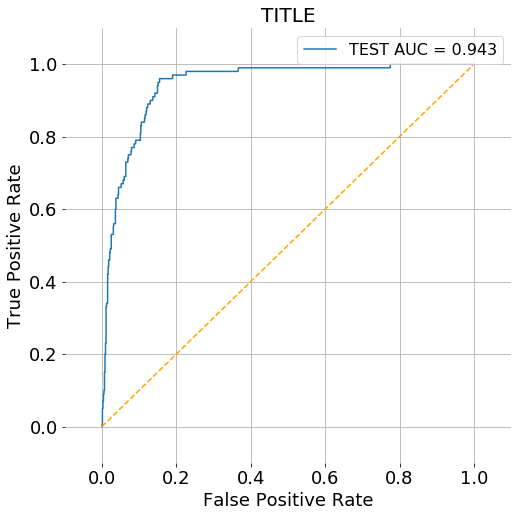

In [334]:
clfV = VotingClassifier(estimators=classifiers, voting = "soft", weights = boosted_weights ,n_jobs=-1) # zeroes set on account of weight grid search
model_names = ["TEST "]
roc_test([(X_train, X_test)], title= "TITLE", save_name="TEST_roc.pdf", model_names=model_names, clf = clfV)

# Some other weights (trail and error)

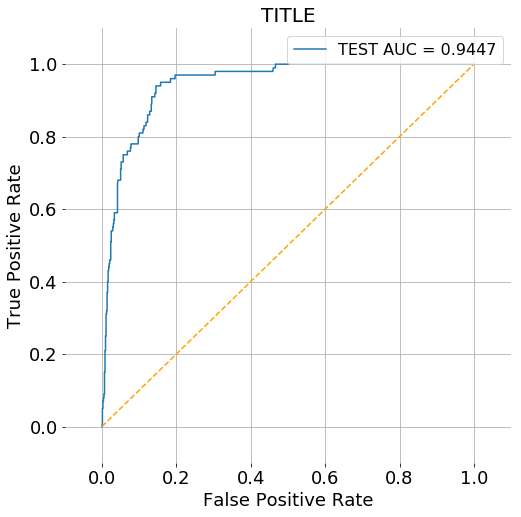

In [340]:
clfV = VotingClassifier(estimators=classifiers, voting = "soft", weights = [0, 2, 1, 1, 0, 2, 0] ,n_jobs=-1) # zeroes set on account of weight grid search
model_names = ["TEST "]
roc_test([(X_train, X_test)], title= "TITLE", save_name="TEST_roc.pdf", model_names=model_names, clf = clfV)

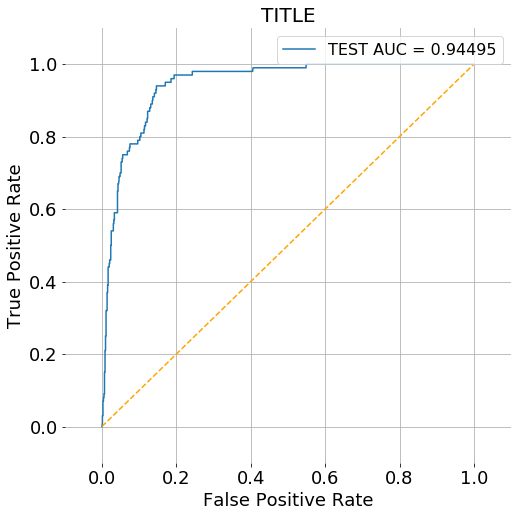

In [341]:
clfV = VotingClassifier(estimators=classifiers, voting = "soft", weights = [0, 2, 1, 1, 1, 2, 0] ,n_jobs=-1) # zeroes set on account of weight grid search
model_names = ["TEST "]
roc_test([(X_train, X_test)], title= "TITLE", save_name="TEST_roc.pdf", model_names=model_names, clf = clfV)

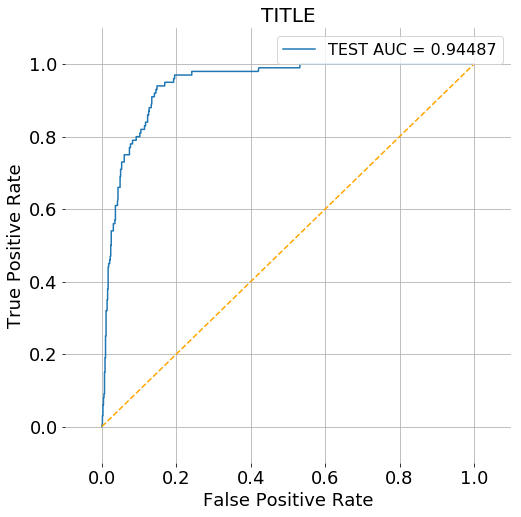

In [342]:
clfV = VotingClassifier(estimators=classifiers, voting = "soft", weights = [0, 2, 2, 1, 1, 2, 0] ,n_jobs=-1) # zeroes set on account of weight grid search
model_names = ["TEST "]
roc_test([(X_train, X_test)], title= "TITLE", save_name="TEST_roc.pdf", model_names=model_names, clf = clfV)

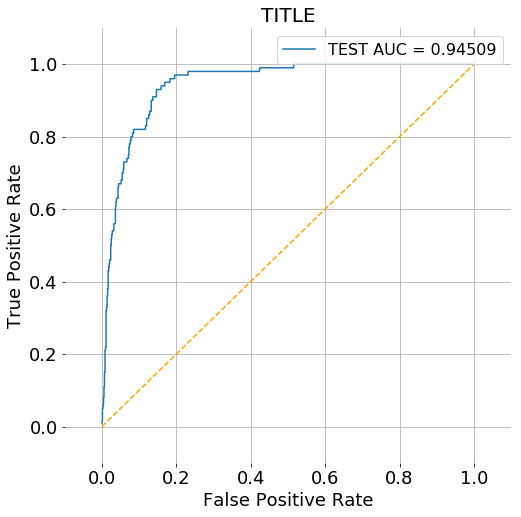

In [343]:
clfV = VotingClassifier(estimators=classifiers, voting = "soft", weights = [0, 3, 2, 1, 1, 3, 0] ,n_jobs=-1) # zeroes set on account of weight grid search
model_names = ["TEST "]
roc_test([(X_train, X_test)], title= "TITLE", save_name="TEST_roc.pdf", model_names=model_names, clf = clfV)

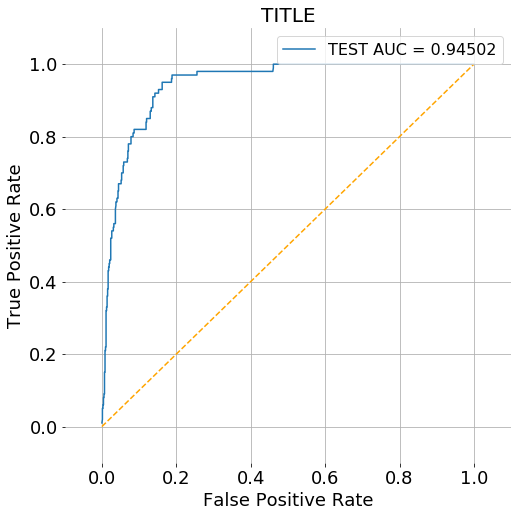

In [344]:
clfV = VotingClassifier(estimators=classifiers, voting = "soft", weights = [0, 3, 2, 1, 0, 3, 0] ,n_jobs=-1) # zeroes set on account of weight grid search
model_names = ["TEST "]
roc_test([(X_train, X_test)], title= "TITLE", save_name="TEST_roc.pdf", model_names=model_names, clf = clfV)

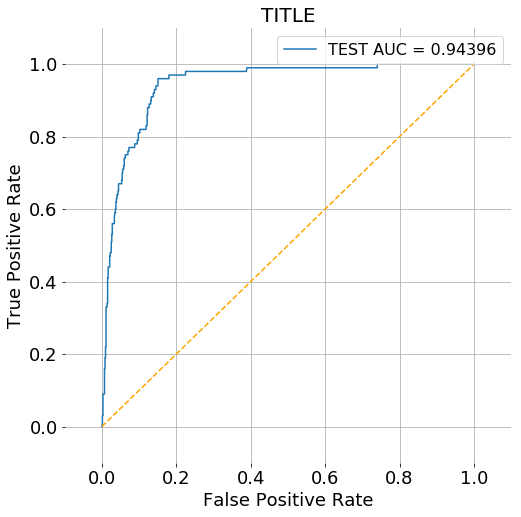

In [347]:
clfV = VotingClassifier(estimators=classifiers, voting = "soft", weights = [1, 4, 3, 2, 2, 4, 1] ,n_jobs=-1) # zeroes set on account of weight grid search
model_names = ["TEST "]
roc_test([(X_train, X_test)], title= "TITLE", save_name="TEST_roc.pdf", model_names=model_names, clf = clfV)

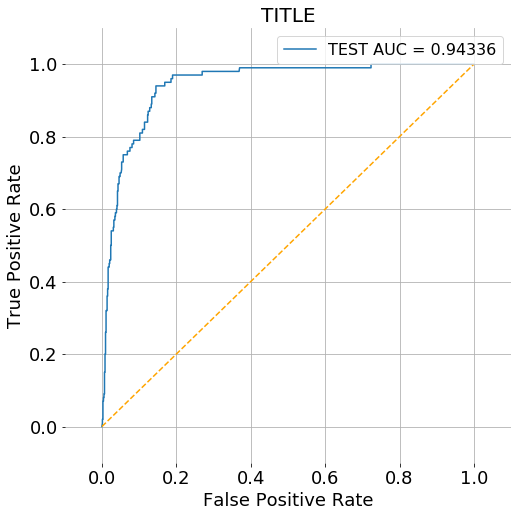

In [346]:
clfV = VotingClassifier(estimators=classifiers, voting = "soft", weights = [0, 4, 3, 2, 2, 4, 1] ,n_jobs=-1) # zeroes set on account of weight grid search
model_names = ["TEST "]
roc_test([(X_train, X_test)], title= "TITLE", save_name="TEST_roc.pdf", model_names=model_names, clf = clfV)

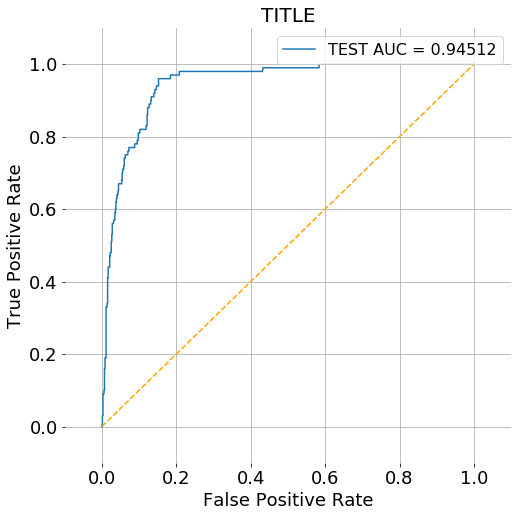

In [345]:
clfV = VotingClassifier(estimators=classifiers, voting = "soft", weights = [1, 4, 3, 2, 2, 4, 0] ,n_jobs=-1) # zeroes set on account of weight grid search
model_names = ["TEST "]
roc_test([(X_train, X_test)], title= "TITLE", save_name="TEST_roc.pdf", model_names=model_names, clf = clfV)

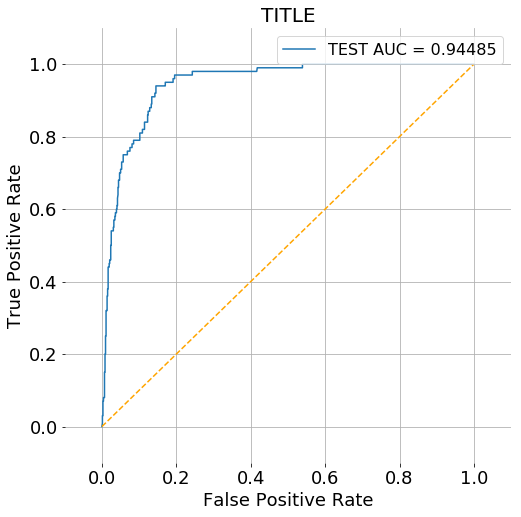

In [348]:
clfV = VotingClassifier(estimators=classifiers, voting = "soft", weights = [0, 4, 3, 2, 2, 4, 0] ,n_jobs=-1) # zeroes set on account of weight grid search
model_names = ["TEST "]
roc_test([(X_train, X_test)], title= "TITLE", save_name="TEST_roc.pdf", model_names=model_names, clf = clfV)

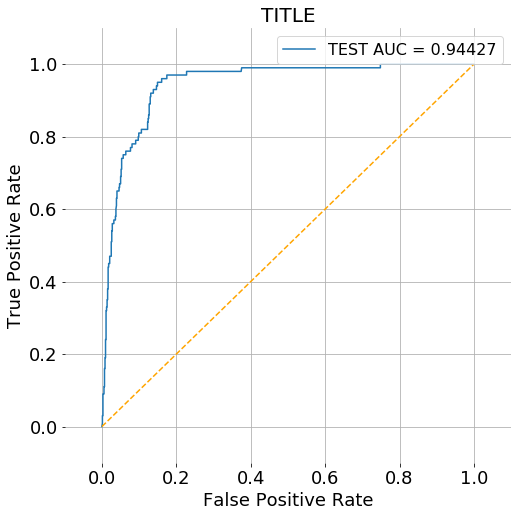

In [349]:
clfV = VotingClassifier(estimators=classifiers, voting = "soft", weights = [1,7,5,3,4,6,2] ,n_jobs=-1) # zeroes set on account of weight grid search
model_names = ["TEST "]
roc_test([(X_train, X_test)], title= "TITLE", save_name="TEST_roc.pdf", model_names=model_names, clf = clfV)

----
# BEST

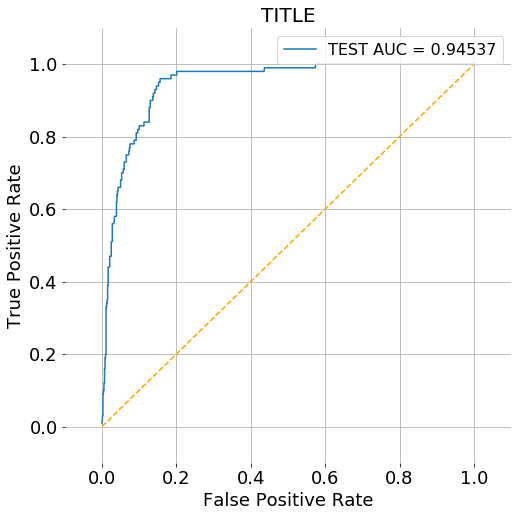

In [350]:
clfV = VotingClassifier(estimators=classifiers, voting = "soft", weights = [1,6,4,2,3,5,0] ,n_jobs=-1) # zeroes set on account of weight grid search
model_names = ["TEST "]
roc_test([(X_train, X_test)], title= "TITLE", save_name="TEST_roc.pdf", model_names=model_names, clf = clfV)

## prettified for assgiment

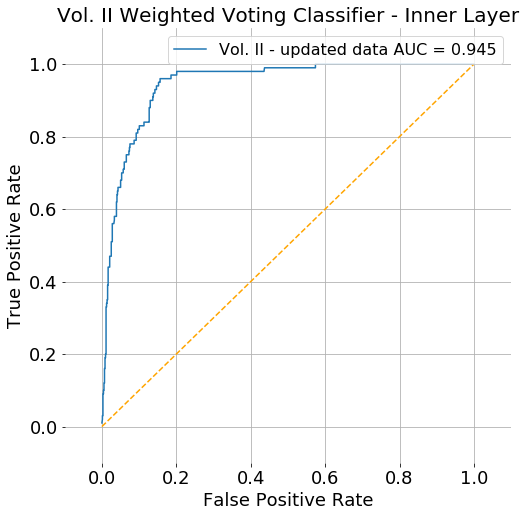

In [529]:
clfV = VotingClassifier(estimators=classifiers, voting = "soft", weights = [1,6,4,2,3,5,0] ,n_jobs=-1) # zeroes set on account of weight grid search
model_names = ["Vol. II - updated data "]
roc_test([(X_train, X_test)], title= "Vol. II Weighted Voting Classifier - Inner Layer", save_name="final_weighted_roc_inner.pdf", model_names=model_names, clf = clfV, digits=3)

# final voting classifier OUTER!!!

In [530]:
y_train_outer = data_done["y_train"] 
X_train_outer = data_done["X_train"]
y_test_outer = data_done["y_test"] 
X_test_outer = data_done["X_test"]

print(y_train_outer.shape)
print(X_train_outer.shape)
print(y_test_outer.shape)
print(X_test_outer.shape)

(4079,)
(4079, 1400)
(1020,)
(1020, 1400)


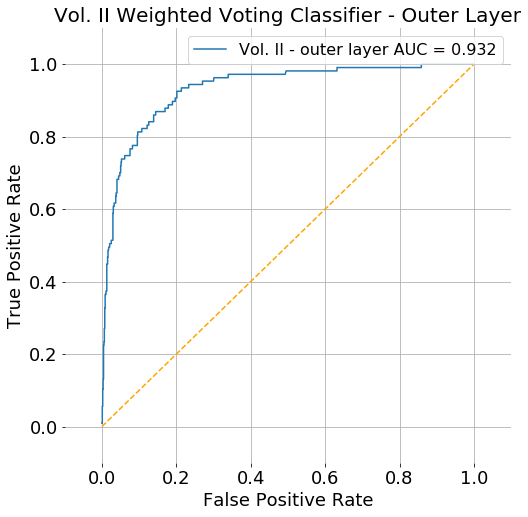

In [532]:
clfV = VotingClassifier(estimators=classifiers, voting = "soft", weights = [1,6,4,2,3,5,0] ,n_jobs=-1) # zeroes set on account of weight grid search
model_names = ["Vol. II - outer layer "]
roc_test([(X_train_outer, X_test_outer)], y_test=y_test_outer, y_train= y_train_outer, title= "Vol. II Weighted Voting Classifier - Outer Layer", save_name="final_weighted_roc_outer.pdf", model_names=model_names, clf = clfV, digits=3)

---

# Over sampling

- 1. over sampling before voting classifier
    - Gird search with under sampling
    
- 2. try more ML estimators on over sample
- 3. Try weighted voting (adabosst)

In [44]:
ros = RandomOverSampler(random_state=42)
sos = SMOTE(random_state=42)
uos = RandomUnderSampler(random_state=42)


X_train_Roversampled, y_Roversampled = ros.fit_sample(X_train, y_train)
X_train_Soversampled, y_Soversampled = sos.fit_sample(X_train, y_train)


In [54]:
X_train_Undersampled, y_Undersampled = uos.fit_sample(X_train, y_train)


In [55]:
X_train_old = X_train 
y_train_old = y_train

In [56]:
# Just way easier
X_train = X_train_Undersampled
y_train = y_Undersampled


# NB ---------------------------------------------
alpha_range = np.arange(0.00001, 0.0001 , 0.000005)
    
param_grid = dict(alpha = alpha_range) 
grid = GridSearchCV(clf2, param_grid, cv=8, scoring="f1", n_jobs = -1) # Bernoulli NB

grid.fit(X_train ,y_train)

best_alpha = grid.best_params_["alpha"]


clf2 = BernoulliNB(alpha=best_alpha) # hentet fra overstående gridS.b
print("NB DONE: 1/4")

# Log Reg ---------------------------------------------

weight_range = [{1:1},{1:1.5},{1:2},{1:2.5},{1:3},{1:3.5},{1:4},{1:4.5},{1:5},{1:5.25},{1:5.5},{1:5.75},{1:6}]    
    
param_grid = dict(class_weight = weight_range) 
grid = GridSearchCV(clf3, param_grid, cv=8, scoring="f1", n_jobs = -1) # clf3 = LogisticRegression

grid.fit(X_train ,y_train) #

best_weight = grid.best_params_["class_weight"]


clf3 = LogisticRegression(class_weight= best_weight) # hentet fra overstående gridS.
print("LOG R DONE: 2/4")

# SGD ----------------------------------------------


weight_range = [{1:1},{1:1.5},{1:1.55},{1:1.6},{1:1.65},{1:1.7},{1:1.75},{1:1.8},{1:1.85},{1:2},{1:2.5}]    
alpha_range = np.arange(0.00001, 0.0001 , 0.000005)
    
param_grid = dict(alpha = alpha_range, class_weight = weight_range, max_iter=[1000]) 
grid = GridSearchCV(clf4, param_grid, cv=8, scoring="f1", n_jobs = -1) # clf4 = SGD Classifier

grid.fit(X_train ,y_train) #

best_alpha = grid.best_params_["alpha"]

best_weight = grid.best_params_["class_weight"]

clf4 = SGDClassifier(alpha=best_alpha, class_weight= best_weight, loss = "log", max_iter=1000, random_state= 42) 
print("SGD DONE: 3/4")


# max_iter=5 and tol=None

# RF ------------------------------------------------

weight_range = [{1:1},{1:1.5},{1:2},{1:2.25},{1:2.5},{1:2.75},{1:3},{1:3.5},{1:4},{1:4.5},{1:5},{1:5.5},{1:6}]    
    
param_grid = dict(class_weight = weight_range) 
grid = GridSearchCV(clf6, param_grid, cv=8, scoring="f1", n_jobs = -1) # clf6 = SGD RF classifier

grid.fit(X_train ,y_train)

best_weight = grid.best_params_["class_weight"]

clf6 = RandomForestClassifier(class_weight= best_weight, random_state= 42)
print("RF DONE: 4/4")


# Voting ----------------------------------------------

clfV = VotingClassifier(estimators=[("1",clf2),("2",clf3),("3",clf4),("4",clf6)],n_jobs=1) # seems to be the best..

# Eval --------------------------------------------
print("Starting evaluation...")

test=clfV.fit(X_train, y_train)
y_pred_class = test.predict(X_test)


print("Confusion matrix: ")
print(metrics.confusion_matrix(y_test, y_pred_class))

print("\n")

print("Train vs. test scores: ")
print('acc: ',metrics.accuracy_score(y_test, y_pred_class))
print('recall: ',metrics.recall_score(y_test, y_pred_class))
print('prec: ',metrics.precision_score(y_test, y_pred_class))
print('f1: ',metrics.f1_score(y_test, y_pred_class))

# Det kan faktisk godt være den giver lidt...

clfV = VotingClassifier(estimators=[("1",clf2),("2",clf3),("3",clf4),("4",clf6)], voting = "soft",n_jobs=1) # seems to be the best..

model_names = ["Vol. I - updated data "]
roc_test([(X_train, X_test)], title= "Final Voting Classifier", save_name="vol_1_new_roc.pdf", model_names=model_names, clf = clfV)


# Just way easier
X_train = X_train_old
y_train = y_train_old


Confusion matrix: 
[[645  71]
 [ 30  70]]


Train vs. test scores: 
acc:  0.8762254901960784
recall:  0.7
prec:  0.49645390070921985
f1:  0.5809128630705395


/home/polichinel/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


ValueError: Found input variables with inconsistent numbers of samples: [670, 3263]

In [58]:
X_train = X_train_old
y_train = y_train_old


/home/polichinel/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Confusion matrix: 
[[700  16]
 [ 50  50]]


Train vs. test scores: 
acc:  0.9191176470588235
recall:  0.5
prec:  0.7575757575757576
f1:  0.6024096385542169


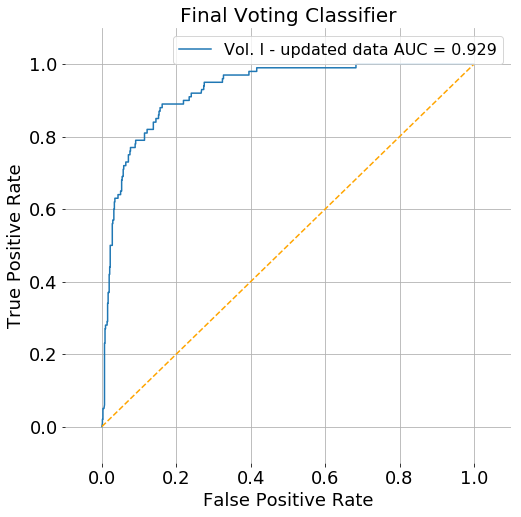

In [57]:
test=clfV.fit(X_train_Roversampled, y_Roversampled)
#test = LogisticRegression().fit(X_train_Roversampled, y_Roversampled)

y_pred_class = test.predict(X_test)


print("Confusion matrix: ")
print(metrics.confusion_matrix(y_test, y_pred_class))

print("\n")

print("Train vs. test scores: ")
print('acc: ',metrics.accuracy_score(y_test, y_pred_class))
print('recall: ',metrics.recall_score(y_test, y_pred_class))
print('prec: ',metrics.precision_score(y_test, y_pred_class))
print('f1: ',metrics.f1_score(y_test, y_pred_class))

# Det kan faktisk godt være den giver lidt...

model_names = ["Vol. I - updated data "]
roc_test([(X_train_Roversampled, X_test)], y_train= y_Roversampled, title= "Final Voting Classifier", save_name="vol_1_new_roc.pdf", model_names=model_names, clf = clfV)



In [52]:
test=clfV.fit(X_train_Roversampled, y_Roversampled)
#test = LogisticRegression().fit(X_train_Roversampled, y_Roversampled)

y_pred_class = test.predict(X_test)


print("Confusion matrix: ")
print(metrics.confusion_matrix(y_test, y_pred_class))

print("\n")

print("Train vs. test scores: ")
print('acc: ',metrics.accuracy_score(y_test, y_pred_class))
print('recall: ',metrics.recall_score(y_test, y_pred_class))
print('prec: ',metrics.precision_score(y_test, y_pred_class))
print('f1: ',metrics.f1_score(y_test, y_pred_class))

# Det kan faktisk godt være den giver lidt...

Confusion matrix: 
[[697  19]
 [ 51  49]]


Train vs. test scores: 
acc:  0.9142156862745098
recall:  0.49
prec:  0.7205882352941176
f1:  0.5833333333333334


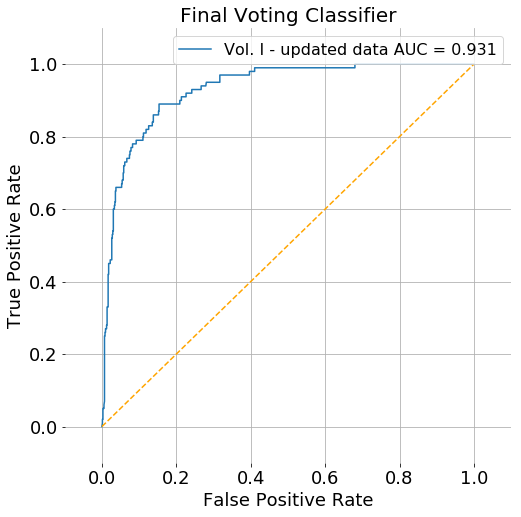

In [53]:
model_names = ["Vol. I - updated data "]
roc_test([(X_train_Roversampled, X_test)], y_train= y_Roversampled, title= "Final Voting Classifier", save_name="vol_1_new_roc.pdf", model_names=model_names, clf = clfV)



---
# Nural Nets

# ANN1

In [379]:
predictors.min() - predictors.min()

0.0

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_614 (Dense)            (None, 32)                44832     
_________________________________________________________________
dense_615 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_616 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_617 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_618 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_54 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_619 (Dense)            (None, 1)                 33        
Total para

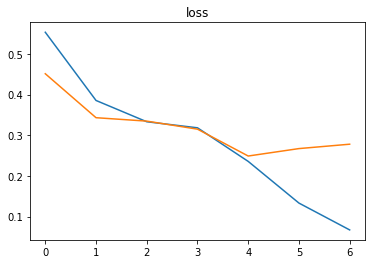

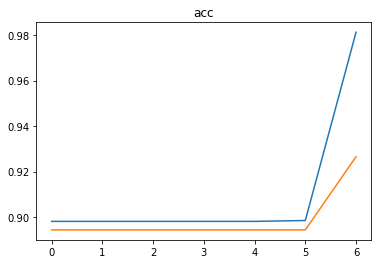

ROC AUC score:  0.926


In [479]:
early_stopping_monitor = EarlyStopping(patience=2) # stop after three epochs with no improvment.

predictors = (((X_train-np.mean(X_train))/np.std(X_train))/100) # np.array(pd.DataFrame(X_train).iloc[:,:-1]) # this is dump
test_predictors = (((X_test-np.mean(X_test))/np.std(X_test))/100) # np.array(pd.DataFrame(X_train).iloc[:,:-1]) # this is dump


categorical_labels = to_categorical(y_train.astype(int), num_classes=None)
target = categorical_labels[:,1]# den her 


n_cols = predictors.shape[1]

model = Sequential()

model.add(Dense(32, activation  = "relu",  input_shape = (n_cols,)))
model.add(Dense(32, activation  = "softmax"))

model.add(Dense(32, activation  = "relu"))
model.add(Dense(32, activation  = "softmax"))

model.add(Dense(32, activation  = "relu"))
model.add(Dropout(0.2))


model.add(Dense(1, activation = "sigmoid"))

model.summary()

model.compile(loss="binary_crossentropy", optimizer = "adam", metrics=["accuracy"])

history = model.fit(predictors, target, epochs = 20, validation_split=0.2, callbacks=[early_stopping_monitor])

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("loss")
plt.show()

plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("acc")
plt.show()

pred_test = model.predict(test_predictors).ravel()# men det er vel bare her du skal havde train in....
auc = round(metrics.roc_auc_score(y_test, pred_test), 3) #TRAIN FORDI DET HER ER MÆRKELIGT.... Måske none i længde?


print("ROC AUC score: ", auc)

Average acc scores as catagorical:
Acc: 0.9812260536398467
Inner val acc: 0.9264931088202215
outter val acc: 0.9068627450980392
Confusion matrix:
[[707   9]
 [ 67  33]]
Recall:  0.33
Precision:  0.7857142857142857
f1:  0.46478873239436624
ROC AUC score:  0.926


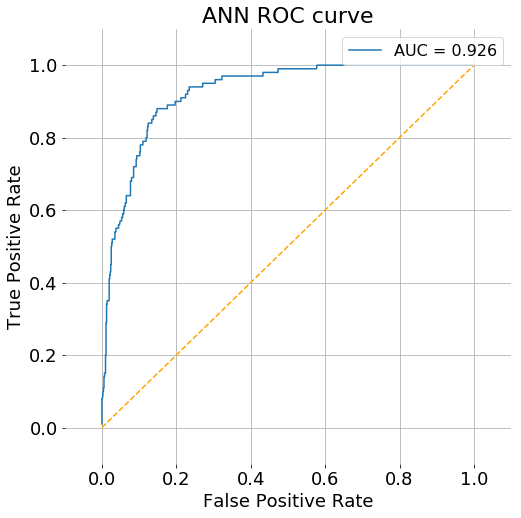

In [480]:

print("Average acc scores as catagorical:")
print("Acc:", history.history["acc"][-1])
print("Inner val acc:", history.history["val_acc"][-1])

#pred_test = model.predict(np.array(X_test))[:,1].ravel()
#pred_test = model.predict(np.array(X_test)).ravel()


print("outter val acc:", acc(y_test, pred_test.round()))  # "round" = so treshold at .5

print("Confusion matrix:")
print(confusion_matrix(y_test, pred_test.round()))

print("Recall: ", recall(y_test, pred_test.round()))
print("Precision: ", precision(y_test, pred_test.round()))
print("f1: ", f1(y_test, pred_test.round()))

auc = round(metrics.roc_auc_score(y_test, pred_test), 3)

print("ROC AUC score: ", auc)



# roc -------------------------------------------------------------------------------------------------------

fpr, tpr, thresholds = roc_curve(y_test, pred_test)

plt.figure(figsize=[8,8])

plt.plot(fpr, tpr, label = "AUC = " + str(auc))
plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), linestyle = "dashed", color = "orange")

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.title('ANN ROC curve', fontsize = 22)
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.grid(True)

sns.despine(left=True, bottom= True)
plt.legend(fontsize = 16)
plt.show()


# ANN 2

In [19]:
# predictors = X_train # np.array(pd.DataFrame(X_train).iloc[:,:-1]) # this is dump

# categorical_labels = to_categorical(y_train.astype(int), num_classes=None)
# target = categorical_labels

# early_stopping_monitor = EarlyStopping(patience=3) # stop after three epochs with no improvment.

# n_cols = predictors.shape[1]
# n_rows = predictors.shape[0]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_645 (Dense)            (None, 500)               700500    
_________________________________________________________________
dense_646 (Dense)            (None, 400)               200400    
_________________________________________________________________
dense_647 (Dense)            (None, 400)               160400    
_________________________________________________________________
dense_648 (Dense)            (None, 300)               120300    
_________________________________________________________________
dense_649 (Dense)            (None, 200)               60200     
_________________________________________________________________
dense_650 (Dense)            (None, 1)                 201       
Total params: 1,242,001
Trainable params: 1,242,001
Non-trainable params: 0
_________________________________________________________________


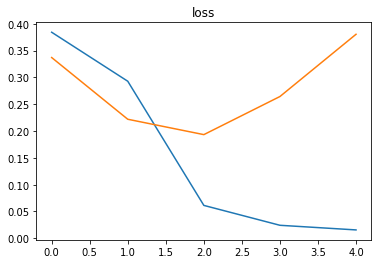

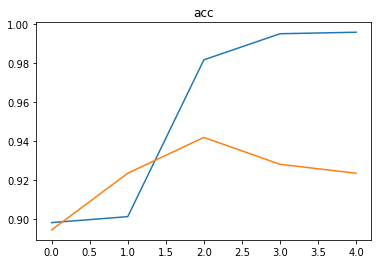

ROC AUC score:  0.921


In [486]:
early_stopping_monitor = EarlyStopping(patience=2) # stop after three epochs with no improvment.

predictors = (((X_train-np.mean(X_train))/np.std(X_train))/100) # np.array(pd.DataFrame(X_train).iloc[:,:-1]) # this is dump
test_predictors = (((X_test-np.mean(X_test))/np.std(X_test))/100) # np.array(pd.DataFrame(X_train).iloc[:,:-1]) # this is dump


categorical_labels = to_categorical(y_train.astype(int), num_classes=None)
target = categorical_labels[:,1]# den her 


n_cols = predictors.shape[1]

model = Sequential()
model.add(Dense(500, activation  = "relu", input_shape = (n_cols,)))

model.add(Dense(400, activation  = "softmax"))

model.add(Dense(400, activation  = "relu"))
model.add(Dense(300, activation  = "relu"))
model.add(Dense(200, activation  = "relu"))

model.add(Dense(1, activation = "sigmoid"))
          
model.summary()

model.compile(loss="binary_crossentropy", optimizer = "adam", metrics=["accuracy"])

history = model.fit(predictors, target, epochs = 20, validation_split=0.2, callbacks=[early_stopping_monitor])

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("loss")
plt.show()

plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("acc")
plt.show()

pred_test = model.predict(test_predictors).ravel()# men det er vel bare her du skal havde train in....
auc = round(metrics.roc_auc_score(y_test, pred_test), 3) #TRAIN FORDI DET HER ER MÆRKELIGT.... Måske none i længde?


print("ROC AUC score: ", auc)

Average acc scores as catagorical:
Acc: 0.9957854406130269
Inner val acc: 0.9234303216839275
outter val acc: 0.8958333333333334
Confusion matrix:
[[706  10]
 [ 75  25]]
Recall:  0.25
Precision:  0.7142857142857143
f1:  0.37037037037037035
ROC AUC score:  0.921


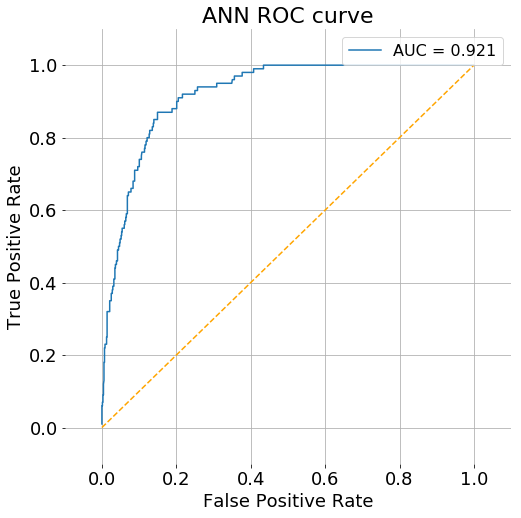

In [487]:

print("Average acc scores as catagorical:")
print("Acc:", history.history["acc"][-1])
print("Inner val acc:", history.history["val_acc"][-1])

print("outter val acc:", acc(y_test, pred_test.round()))  # "round" = so treshold at .5

print("Confusion matrix:")
print(confusion_matrix(y_test, pred_test.round()))

print("Recall: ", recall(y_test, pred_test.round()))
print("Precision: ", precision(y_test, pred_test.round()))
print("f1: ", f1(y_test, pred_test.round()))

auc = round(metrics.roc_auc_score(y_test, pred_test), 3)

print("ROC AUC score: ", auc)



# roc -------------------------------------------------------------------------------------------------------

fpr, tpr, thresholds = roc_curve(y_test, pred_test)

plt.figure(figsize=[8,8])

plt.plot(fpr, tpr, label = "AUC = " + str(auc))
plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), linestyle = "dashed", color = "orange")

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.title('ANN ROC curve', fontsize = 22)
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.grid(True)

sns.despine(left=True, bottom= True)
plt.legend(fontsize = 16)
plt.show()


# RNN

In [492]:
from keras.layers import Embedding, SimpleRNN


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_21 (SimpleRNN)    (None, 1, 32)             45856     
_________________________________________________________________
simple_rnn_22 (SimpleRNN)    (None, 1, 32)             2080      
_________________________________________________________________
simple_rnn_23 (SimpleRNN)    (None, 1, 32)             2080      
_________________________________________________________________
simple_rnn_24 (SimpleRNN)    (None, 1, 32)             2080      
_________________________________________________________________
dense_675 (Dense)            (None, 1, 32)             1056      
_________________________________________________________________
simple_rnn_25 (SimpleRNN)    (None, 32)                2080      
_________________________________________________________________
dense_676 (Dense)            (None, 1)                 33        
__________

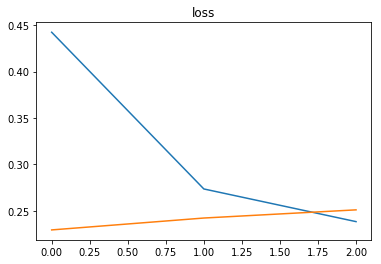

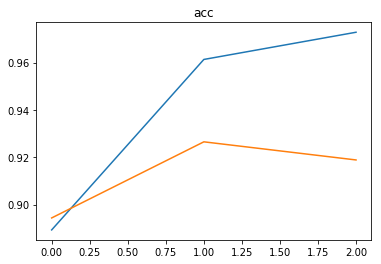

ROC AUC score:  0.898


In [517]:
# data prep ------------------------------------------------------------------------------------------------------------------
n_cols = X_train.shape[1]
n_rows = X_train.shape[0]
test_rows = X_test.shape[0]
seq_length = 1

early_stopping_monitor = EarlyStopping(patience=2) #

predictors = ((X_train-np.mean(X_train))/np.std(X_train))/100 #
predictors = np.array(predictors)

test_predictors = ((X_test-np.mean(X_test))/np.std(X_test))/100 # 
test_predictors = np.array(test_predictors)



predictors = predictors.reshape((n_rows, 1, n_cols))
test_predictors =  test_predictors.reshape((test_rows, 1,n_cols))


categorical_labels = to_categorical(y_train.astype(int), num_classes=None)
target = categorical_labels[:,1]# den her 
target =  target.reshape((n_rows, 1))


# the model ------------------------------------------------------------------------------------------------------------------

model = Sequential()
model.add(SimpleRNN(32, return_sequences = True, recurrent_dropout = 0.2, activation  = "relu", input_shape=(predictors.shape[1], predictors.shape[2])))

model.add(SimpleRNN(32, return_sequences = True, recurrent_dropout = 0.2, activation  = "relu"))
model.add(SimpleRNN(32, return_sequences = True, recurrent_dropout = 0.2, activation  = "relu"))
model.add(SimpleRNN(32, return_sequences = True, recurrent_dropout = 0.2, activation  = "relu"))

model.add(Dense(32, activation  = "softmax"))


model.add(SimpleRNN(32, return_sequences = False, activation  = "relu"))


model.add(Dense(1, activation='sigmoid'))
model.add(Dropout(0.1))

model.compile(loss="binary_crossentropy", optimizer = "adam", metrics=["accuracy"])
model.summary()


history = model.fit(predictors, target, epochs = 10, batch_size=1, validation_split=0.2, callbacks=[early_stopping_monitor])
# the output ------------------------------------------------------------------------------------------------------------------


plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("loss")

plt.show()

plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("acc")

plt.show()

pred_test = model.predict(test_predictors).ravel()# men det er vel bare her du skal havde train in....
auc = round(metrics.roc_auc_score(y_test, pred_test), 3) #TRAIN FORDI DET HER ER MÆRKELIGT.... Måske none i længde?

print("ROC AUC score: ", auc)

Average acc scores as catagorical:
Acc: 0.9727969348659004
Inner val acc: 0.9188361408882083
outter val acc: 0.9044117647058824
Confusion matrix:
[[705  11]
 [ 67  33]]
Recall:  0.33
Precision:  0.75
f1:  0.4583333333333333
ROC AUC score:  0.898


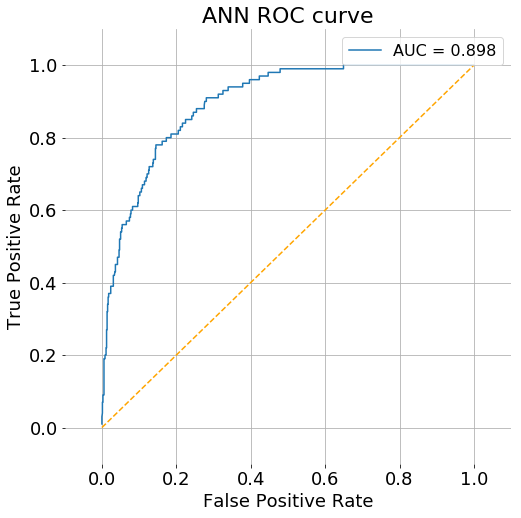

In [518]:

print("Average acc scores as catagorical:")
print("Acc:", history.history["acc"][-1])
print("Inner val acc:", history.history["val_acc"][-1])

print("outter val acc:", acc(y_test, pred_test.round()))  # "round" = so treshold at .5

print("Confusion matrix:")
print(confusion_matrix(y_test, pred_test.round()))

print("Recall: ", recall(y_test, pred_test.round()))
print("Precision: ", precision(y_test, pred_test.round()))
print("f1: ", f1(y_test, pred_test.round()))

auc = round(metrics.roc_auc_score(y_test, pred_test), 3)

print("ROC AUC score: ", auc)



# roc -------------------------------------------------------------------------------------------------------

fpr, tpr, thresholds = roc_curve(y_test, pred_test)

plt.figure(figsize=[8,8])

plt.plot(fpr, tpr, label = "AUC = " + str(auc))
plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), linestyle = "dashed", color = "orange")

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.title('ANN ROC curve', fontsize = 22)
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.grid(True)

sns.despine(left=True, bottom= True)
plt.legend(fontsize = 16)
plt.show()


# LSTM 

Train on 652 samples, validate on 2611 samples
Epoch 1/10
652/652 [==============================] - 43s 65ms/step - loss: 0.5307 - acc: 0.8497 - val_loss: 0.3312 - val_acc: 0.8974
Epoch 2/10
652/652 [==============================] - 25s 39ms/step - loss: 0.3733 - acc: 0.8972 - val_loss: 0.2940 - val_acc: 0.8974
Epoch 3/10
652/652 [==============================] - 25s 39ms/step - loss: 0.3299 - acc: 0.9248 - val_loss: 0.2511 - val_acc: 0.9188
Epoch 4/10
652/652 [==============================] - 27s 41ms/step - loss: 0.1573 - acc: 0.9877 - val_loss: 0.2839 - val_acc: 0.9207
Epoch 5/10
652/652 [==============================] - 26s 40ms/step - loss: 0.1288 - acc: 0.9908 - val_loss: 0.3959 - val_acc: 0.9111
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_61 (LSTM)               (None, 1, 32)             183424    
_________________________________________________________________
lstm_62 (LSTM)     

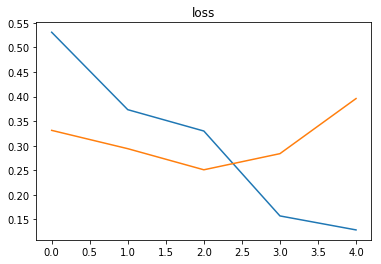

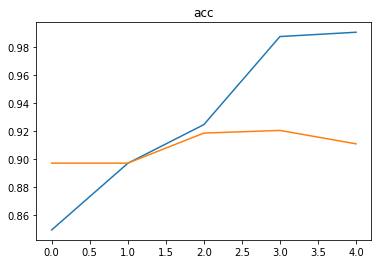

ROC AUC score:  0.85


In [524]:
# data prep ------------------------------------------------------------------------------------------------------------------
n_cols = X_train.shape[1]
n_rows = X_train.shape[0]
test_rows = X_test.shape[0]
seq_length = int(1)

early_stopping_monitor = EarlyStopping(patience=2) #

predictors = ((X_train-np.mean(X_train))/np.std(X_train))/100 #
predictors = np.array(predictors)

test_predictors = ((X_test-np.mean(X_test))/np.std(X_test))/100 # 
test_predictors = np.array(test_predictors)



predictors = predictors.reshape((n_rows, seq_length, n_cols))
test_predictors =  test_predictors.reshape((test_rows, seq_length,n_cols))


categorical_labels = to_categorical(y_train.astype(int), num_classes=None)
target = categorical_labels[:,1]# den her 
target =  target.reshape((n_rows, seq_length))


# the model ------------------------------------------------------------------------------------------------------------------

model = Sequential()
model.add(LSTM(32, return_sequences = True, recurrent_dropout = 0.2, activation  = "tanh", input_shape=(predictors.shape[1], predictors.shape[2])))

model.add(LSTM(32, return_sequences = True, recurrent_dropout = 0.2, activation  = "tanh"))
model.add(LSTM(32, return_sequences = True, recurrent_dropout = 0.2, activation  = "tanh"))
model.add(LSTM(32, return_sequences = True, recurrent_dropout = 0.2, activation  = "tanh"))

model.add(Dense(32, activation  = "softmax"))

model.add(LSTM(32, return_sequences = False, activation  = "tanh"))


model.add(Dense(1, activation='sigmoid'))
model.add(Dropout(0.1))

model.compile(loss="binary_crossentropy", optimizer = "adam", metrics=["accuracy"])

history = model.fit(predictors, target, epochs = 10, batch_size=1, validation_split=0.8, callbacks=[early_stopping_monitor])
# the output ------------------------------------------------------------------------------------------------------------------


model.summary()


plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("loss")

plt.show()

plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])

plt.title("acc")
plt.show()

pred_test = model.predict(test_predictors).ravel()
auc = round(metrics.roc_auc_score(y_test, pred_test), 3) 
print("ROC AUC score: ", auc)

Average acc scores as catagorical:
Acc: 0.99079754601227
Inner val acc: 0.9111451551129836
outter val acc: 0.8897058823529411
Confusion matrix:
[[712   4]
 [ 86  14]]
Recall:  0.14
Precision:  0.7777777777777778
f1:  0.23728813559322035
ROC AUC score:  0.85


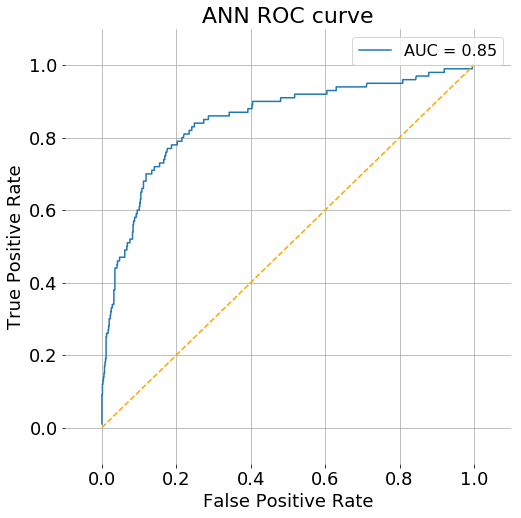

In [525]:

print("Average acc scores as catagorical:")
print("Acc:", history.history["acc"][-1])
print("Inner val acc:", history.history["val_acc"][-1])

print("outter val acc:", acc(y_test, pred_test.round()))  # "round" = so treshold at .5

print("Confusion matrix:")
print(confusion_matrix(y_test, pred_test.round()))

print("Recall: ", recall(y_test, pred_test.round()))
print("Precision: ", precision(y_test, pred_test.round()))
print("f1: ", f1(y_test, pred_test.round()))

auc = round(metrics.roc_auc_score(y_test, pred_test), 3)

print("ROC AUC score: ", auc)



# roc -------------------------------------------------------------------------------------------------------

fpr, tpr, thresholds = roc_curve(y_test, pred_test)

plt.figure(figsize=[8,8])

plt.plot(fpr, tpr, label = "AUC = " + str(auc))
plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), linestyle = "dashed", color = "orange")

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.title('ANN ROC curve', fontsize = 22)
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.grid(True)

sns.despine(left=True, bottom= True)
plt.legend(fontsize = 16)
plt.show()
